In [1]:
import pandas as pd  
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('curatedIII.csv', encoding='latin-1')

print(df.head())
print(df.info())
print(df.describe())

      Client Name      Project Name        TECH-Mgmt Tech Score  \
0   apply digital  tech accelerator  ignacio miranda    neutral   
1  caja los andes       tapp mobile  junior martinez    neutral   
2  caja los andes          tapp web      juan romero    neutral   
3          curran               mvp     daniel perez    neutral   
4         embonor           app b2b      ever aliaga    neutral   

                                               RAIDD  
0  development work  actualizando componentes del...  
1         se estÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ£Ã...  
2             ss       ya que tenemos los reposit...  
3        loni y joe ya no estan en el equipo.   p...  
4        riesgo de subestimaciÃÂÃÂÃÂÃÂÃÂ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Client Name   743 non-null    object
 1   Project Name  743 non-null    ob

### Missing Data:
    Identify the row with missing value on 'Project Name'

In [3]:
# Find the row with a missing 'Project Name'
missing_project_row = df[df['Project Name'].isna()]

# print the row number and corresponding values
if not missing_project_row.empty:
    row_number = missing_project_row.index[0]
    client_name = missing_project_row['Client Name'].values[0]
    tech_mgmt = missing_project_row['TECH-Mgmt'].values[0]

    print(f"Row number with missing 'Project Name': {row_number}")
    print(f"Client Name: {client_name}")
    print(f"TECH-Mgmt: {tech_mgmt}")
else:
    print("No missing values in 'Project Name' column")

# Describe 'Client Name' and 'TECH-Mgmt'
print("\nDescription of 'Client Name':\n", df['Client Name'].describe())
print("\nDescription of 'TECH-Mgmt':\n", df['TECH-Mgmt'].describe())

No missing values in 'Project Name' column

Description of 'Client Name':
 count         743
unique         14
top       embonor
freq          178
Name: Client Name, dtype: object

Description of 'TECH-Mgmt':
 count                  743
unique                  41
top       jonathan delgado
freq                    65
Name: TECH-Mgmt, dtype: object


In [4]:
print(df.iloc[[480]])

     Client Name       Project Name      TECH-Mgmt Tech Score  \
480  bancolombia  bancolombia audit  jaime vasquez    neutral   

                                                 RAIDD  
480              ss         se estÃÂÃÂÃÂÃÂÃ...  


In [5]:
# Convert 'Client Name' to lowercase for consistent comparison
df['Client Name'] = df['Client Name'].str.lower()

# Fill the empty 'Project Name' where 'Client Name' is 'bancolombia' (now lowercase)
df.loc[(df['Client Name'] == 'bancolombia') & (df['Project Name'].isna()), 'Project Name'] = 'bancolombia audit' 

# Now let's check if there are still any NaN values in 'Project Name' where 'Client Name' is 'bancolombia'
print(df.loc[(df['Client Name'] == 'bancolombia') & (df['Project Name'].isna())])

Empty DataFrame
Columns: [Client Name, Project Name, TECH-Mgmt, Tech Score, RAIDD]
Index: []


In [6]:
print(df.iloc[480])

Client Name                                           bancolombia
Project Name                                    bancolombia audit
TECH-Mgmt                                           jaime vasquez
Tech Score                                                neutral
RAIDD                       ss         se estÃÂÃÂÃÂÃÂÃ...
Name: 480, dtype: object


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Client Name   743 non-null    object
 1   Project Name  743 non-null    object
 2   TECH-Mgmt     743 non-null    object
 3   Tech Score    743 non-null    object
 4   RAIDD         743 non-null    object
dtypes: object(5)
memory usage: 29.2+ KB
None


In [8]:
df.to_csv('curatedIII.csv', index=False)

### Visualize 

    Bar chart: Show the frequency of different clients, projects, or tech managers.
    Pie chart: Visualize the distribution of Tech Score.

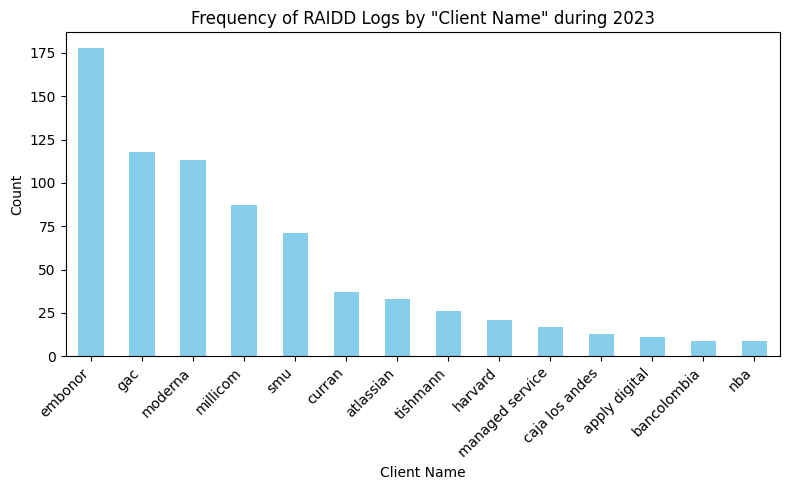

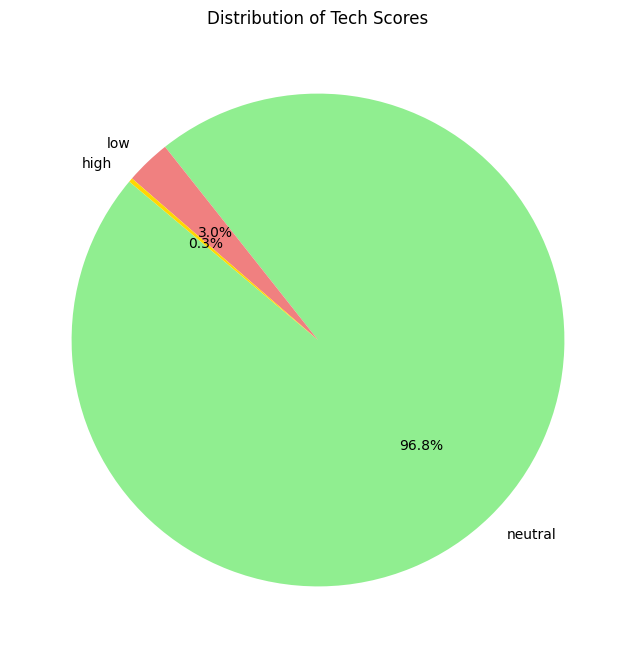

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


# 1. Bar chart of client frequency
plt.figure(figsize=(8, 5))
df['Client Name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of RAIDD Logs by "Client Name" during 2023')
plt.xlabel('Client Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Pie chart of 'Tech Score' distribution
plt.figure(figsize=(8, 8))
df['Tech Score'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'gold'])
plt.title('Distribution of Tech Scores')
plt.ylabel('') 
plt.show()


### Explore RAIDD

    Check the length of the descriptions.
    Look for common words or phrases to understand the main topics.
    See if there are any patterns in RAIDD related to different clients, projects, or tech managers.


In [10]:
import pandas as pd
from collections import Counter

# 1. Check the length of descriptions in 'RAIDD'
df['RAIDD_length'] = df['RAIDD'].apply(len)
print("Descriptive statistics for 'RAIDD_length':")
print(df['RAIDD_length'].describe())

# 2. Look for common words or phrases in 'RAIDD'
all_words = ' '.join(df['RAIDD'].astype(str)).lower().split()
word_counts = Counter(all_words)
print("\nMost common words in 'RAIDD':")
print(word_counts.most_common(20))  # Print top 20 most common words

# 3. See if there are patterns in 'RAIDD' related to different clients, projects, or tech managers

# Example: Check if certain words are more common for specific clients
for client in df['Client Name'].unique():
    client_words = ' '.join(df[df['Client Name'] == client]['RAIDD'].astype(str)).lower().split()
    client_word_counts = Counter(client_words)
    print(f"\nMost common words for {client}:")
    print(client_word_counts.most_common(10))  # Print top 10 words for each client

Descriptive statistics for 'RAIDD_length':
count     743.000000
mean     1008.135935
std       709.813418
min        21.000000
25%       499.000000
50%       817.000000
75%      1333.500000
max      3751.000000
Name: RAIDD_length, dtype: float64

Most common words in 'RAIDD':
[('de', 5427), ('el', 2533), ('en', 2469), ('se', 2137), ('la', 2038), ('que', 1831), ('a', 1696), ('para', 1658), ('los', 1416), ('y', 1252), ('del', 1135), ('no', 858), ('con', 852), ('un', 714), ('ss', 654), ('por', 632), ('las', 617), ('esta', 480), ('equipo', 436), ('al', 390)]

Most common words for apply digital:
[('el', 70), ('de', 56), ('se', 37), ('para', 32), ('del', 25), ('en', 25), ('la', 24), ('y', 23), ('estã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x83ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â£ã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x82ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â¡', 20), ('los', 19)]

Most common words for caja los andes:
[('de', 62), ('el', 53), ('para', 35), ('y', 29), ('se', 28), ('que', 22), ('la', 1

## Volver a la Tokenización
    * Posiblemente hay que cargar df_2023 raw data y reemplazar toda palabra con tilde y pasar a mins 
    * Repetir el bloque de código anterior y contar por proyecto

## CSV 2023 - Nueva carga, reemplazando tildes

In [11]:
df = pd.read_csv('df_2023.csv', encoding='latin-1')


In [12]:
df


,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,Development Work:\nActualizando componentes de...
1,Atlassian,Knowledge Base Platform,Mariana Valdespino,Neutral,NaN
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,RISKS:\n\n - Se estÃ¡n modificando los figmas ...
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...
4,Curran,MVP,Daniel Perez,Neutral,RISKS:\n\n1. Loni y Joe ya no estan en el equi...
...,...,...,...,...,...
782,Moderna,SpikeVax,Juan Romero,Neutral,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...
783,Moderna,Platform,JoaquÃ­n TÃ©llez,Neutral,RISKS\n1. Okta va a eliminar una funcionalidad...
784,Moderna,Finance,Jhonder Quintero,Neutral,RISKS\nEl cliente quiere ver los avances en ap...
785,Harvard,HBS,Rodrigo Flandez,Neutral,RISK\n- Se estÃ¡ reconstruyendo la libreria de...


In [13]:
# Load the data
df = pd.read_csv('df_2023.csv', encoding='latin-1')

# Filter out rows where 'RAIDD' is NaN or its length is less than 20
df_curated = df.dropna(subset=['RAIDD'])
df_curated = df_curated[df_curated['RAIDD'].astype(str).str.len() >= 20]

# Clean the 'RAIDD' column
df_curated['RAIDD'] = df_curated['RAIDD'].astype(str).str.replace('*', '', regex=False).str.replace('N/A', '', regex=False)

# Print the number of rows in the curated DataFrame
print(f"\nNumber of rows in df_curated: {len(df_curated)}")

# Print the column names
print("\nColumn Names:")
print(df_curated.columns.tolist())

# Print the first 5 rows
print("\nFirst 5 rows:")
print(df_curated.head().to_string(index=False))


Number of rows in df_curated: 743

Column Names:
['Client Name', 'Project Name', 'TECH-Mgmt', 'Tech Score', 'RAIDD']

First 5 rows:
   Client Name     Project Name       TECH-Mgmt Tech Score                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
import pandas as pd
from collections import Counter

# (Asumiendo que 'df' ya está cargado)

# Define a function to check for symbols in a string
def check_for_symbols(text):
    for char in text:
        if not char.isalnum() and char not in ".,;:'\"!?()[]{} -_":
            return True
    return False

# Check for symbols in the `RAIDD` column
has_symbols = df['RAIDD'].astype(str).apply(check_for_symbols)

# Filter the DataFrame to include only rows with symbols
rows_with_symbols = df[has_symbols]

# Extract the `RAIDD` column from the filtered DataFrame
sentences_with_symbols = rows_with_symbols['RAIDD'].astype(str).tolist()

# Split each sentence into individual words
words_with_symbols = []
for sentence in sentences_with_symbols:
    words_with_symbols.extend(sentence.split())

# Count the occurrences of each word
word_counts = Counter(words_with_symbols)

# Print the words with symbols and their counts
print("Palabras con símbolos en la columna RAIDD:")
for word, count in word_counts.items():
    if check_for_symbols(word):
        print(f"{word}: {count}")

Palabras con símbolos en la columna RAIDD:
diseÃ±os.: 2
PodrÃ­a: 3
verÃ¡: 2
rÃ¡pido: 13
serÃ¡: 28
N/A: 1145
diseÃ±o.: 6
estÃ¡n: 154
quÃ©: 11
podrÃ­amos: 1
estÃ¡: 336
librerÃ­a: 48
tamaÃ±o: 8
aÃ±o.: 4
*: 7
realizÃ¡n: 2
tÃ©cnivos: 2
UX/UI: 2
tÃ©cnica: 64
mÃ¡s: 112
tÃ©cnica:: 2
parÃ¡metros: 2
estÃ¡ndar: 1
tecnologÃ­as: 10
|: 205
BÃ¡sicamente,: 1
analÃ­tics.: 2
trabajarÃ¡: 3
aÃ±o: 6
comenzarÃ¡: 5
cÃ©lula: 23
asÃ­: 36
caÃ­dos: 9
mÃ©todo: 14
guÃ­a: 20
aÃ±o,: 1
cÃ©lula.: 2
88%: 1
tÃ©cnico: 7
**RISK**: 2
**ASSUMPTIONS**: 2
**ISSUES**: 2
borde)|: 4
**DECISIONS**: 2
**DEPENDENCIES**: 2
librerÃ­as,: 2
tambiÃ©n: 17
faltarÃ­an: 1
dÃ­as: 44
entrarÃ¡: 34
crÃ­ticos,: 34
estratÃ©gicos,: 34
esporÃ¡dicamente: 4
aparecÃ­an: 4
rÃ¡pida: 5
cÃ¡lculo: 4
resultarÃ­a: 7
crÃ­ticos.: 5
SerÃ­a: 4
crÃ­ticos: 5
deberÃ­a: 21
trabajarÃ¡n: 7
diseÃ±os: 54
limitarÃ¡: 4
agregarÃ¡n: 2
deberÃ¡: 12
paÃ­s: 27
CristiÃ¡n): 1
ocurrirÃ¡: 2
podrÃ­an: 4
diseÃ±o: 62
tomarÃ¡: 3
catÃ¡logo,: 2
revisarÃ¡: 8
estarÃ¡: 20
100%.: 3
100%: 12


In [15]:
def limpiar_texto(texto):
  """
  Reemplaza los caracteres especiales en un texto con sus equivalentes normales.

  Args:
    texto: El texto a limpiar.

  Returns:
    El texto limpio.
  """
  texto = texto.replace('Ã¡', 'a')
  texto = texto.replace('Ã±', 'n')
  texto = texto.replace('Ã©', 'e')
  texto = texto.replace('Ã­', 'i')
  # Agrega aquí más reemplazos si es necesario
  return texto

# Aplica la función limpiar_texto a la columna 'RAIDD'
df['RAIDD_limpio'] = df['RAIDD'].astype(str).apply(limpiar_texto)

In [16]:
df

,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD,RAIDD_limpio
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,Development Work:\nActualizando componentes de...,Development Work:\nActualizando componentes de...
1,Atlassian,Knowledge Base Platform,Mariana Valdespino,Neutral,NaN,nan
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,RISKS:\n\n - Se estÃ¡n modificando los figmas ...,RISKS:\n\n - Se estan modificando los figmas y...
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...
4,Curran,MVP,Daniel Perez,Neutral,RISKS:\n\n1. Loni y Joe ya no estan en el equi...,RISKS:\n\n1. Loni y Joe ya no estan en el equi...
...,...,...,...,...,...,...
782,Moderna,SpikeVax,Juan Romero,Neutral,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...
783,Moderna,Platform,JoaquÃ­n TÃ©llez,Neutral,RISKS\n1. Okta va a eliminar una funcionalidad...,RISKS\n1. Okta va a eliminar una funcionalidad...
784,Moderna,Finance,Jhonder Quintero,Neutral,RISKS\nEl cliente quiere ver los avances en ap...,RISKS\nEl cliente quiere ver los avances en ap...
785,Harvard,HBS,Rodrigo Flandez,Neutral,RISK\n- Se estÃ¡ reconstruyendo la libreria de...,RISK\n- Se esta reconstruyendo la libreria de ...


In [17]:
# Define a function to check for symbols in a string
def check_for_symbols(text):
    for char in text:
        if not char.isalnum() and char not in ".,;:'\"!?()[]{} -_":
            return True
    return False

# Check for symbols in the `RAIDD` column
has_symbols = df['RAIDD_limpio'].astype(str).apply(check_for_symbols)

# Filter the DataFrame to include only rows with symbols
rows_with_symbols = df[has_symbols]

# Extract the `RAIDD` column from the filtered DataFrame
sentences_with_symbols = rows_with_symbols['RAIDD_limpio'].astype(str).tolist()

# Split each sentence into individual words
words_with_symbols = []
for sentence in sentences_with_symbols:
    words_with_symbols.extend(sentence.split())

# Count the occurrences of each word
word_counts = Counter(words_with_symbols)

# Print the words with symbols and their counts
print("Palabras con símbolos en la columna RAIDD_limpio:")
for word, count in word_counts.items():
    if check_for_symbols(word):
        print(f"{word}: {count}")

Palabras con símbolos en la columna RAIDD_limpio:
N/A: 1145
*: 7
UX/UI: 2
|: 205
88%: 1
**RISK**: 2
**ASSUMPTIONS**: 2
**ISSUES**: 2
borde)|: 4
**DECISIONS**: 2
**DEPENDENCIES**: 2
100%.: 3
100%: 12
vistas/componentes: 1
/: 18
disenos/mockups: 1
ui/ux: 1
+: 10
(*Embol: 1
BASXX80*): 1
60%,: 1
30%.: 1
UI/UX: 3
`order-service`.: 2
feat/fix: 1
GAC/Americar).: 1
###: 295
y/o: 15
`data-source-service`: 2
"/": 1
etcâ¦): 1
#embonor-alert-all: 1
/home: 1
**Jose: 1
Varela**.: 1
**Victor: 2
Rio**: 2
&: 8
(register/sign: 1
renovar/terminar: 1
**Hacen: 1
manual.**: 1
~100: 1
([EFDV-199](https://reigncl.atlassian.net/browse/EFDV-199)): 2
([EFDV-212](https://reigncl.atlassian.net/browse/EFDV-212)): 1
85%.: 3
85%: 2
85%,: 1
68%: 1
Analytics/SEO: 1
@applydigital/moderna-web-components-library: 1
@moderna/moderna-web-components-library: 1
**: 4
50%: 2
80%: 1
corto/mediano: 2
**Necesito: 2
infra.**: 2
90%: 11
>: 1
85%): 1
âFlexibilidad: 2
creditoâ: 2
86%: 1
draft/preview: 1
[EFDV-390](https://reignc

In [18]:
df

,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD,RAIDD_limpio
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,Development Work:\nActualizando componentes de...,Development Work:\nActualizando componentes de...
1,Atlassian,Knowledge Base Platform,Mariana Valdespino,Neutral,NaN,nan
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,RISKS:\n\n - Se estÃ¡n modificando los figmas ...,RISKS:\n\n - Se estan modificando los figmas y...
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...
4,Curran,MVP,Daniel Perez,Neutral,RISKS:\n\n1. Loni y Joe ya no estan en el equi...,RISKS:\n\n1. Loni y Joe ya no estan en el equi...
...,...,...,...,...,...,...
782,Moderna,SpikeVax,Juan Romero,Neutral,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...
783,Moderna,Platform,JoaquÃ­n TÃ©llez,Neutral,RISKS\n1. Okta va a eliminar una funcionalidad...,RISKS\n1. Okta va a eliminar una funcionalidad...
784,Moderna,Finance,Jhonder Quintero,Neutral,RISKS\nEl cliente quiere ver los avances en ap...,RISKS\nEl cliente quiere ver los avances en ap...
785,Harvard,HBS,Rodrigo Flandez,Neutral,RISK\n- Se estÃ¡ reconstruyendo la libreria de...,RISK\n- Se esta reconstruyendo la libreria de ...


In [19]:
df.to_csv('df_2023_RAIDD_limpio.csv', index=False, encoding='latin-1') 

In [20]:
df = pd.read_csv('df_2023_RAIDD_limpio.csv', encoding='latin-1')


In [21]:
# Eliminar filas con valores nulos o vacíos en 'RAIDD_limpio'
df.dropna(subset=["RAIDD_limpio"], inplace=True)
df = df[df['RAIDD_limpio'].astype(str).str.strip() != ""]
df = df[df['RAIDD_limpio'].astype(str).str.lower() != "nan"]

In [22]:
df

,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD,RAIDD_limpio
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,Development Work:\nActualizando componentes de...,Development Work:\nActualizando componentes de...
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,RISKS:\n\n - Se estÃ¡n modificando los figmas ...,RISKS:\n\n - Se estan modificando los figmas y...
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...
4,Curran,MVP,Daniel Perez,Neutral,RISKS:\n\n1. Loni y Joe ya no estan en el equi...,RISKS:\n\n1. Loni y Joe ya no estan en el equi...
6,Embonor,APP B2B,Ever Aliaga,Neutral,Risks:\n\n- Riesgo de subestimaciÃ³n: Subestim...,Risks:\n\n- Riesgo de subestimaciÃ³n: Subestim...
...,...,...,...,...,...,...
782,Moderna,SpikeVax,Juan Romero,Neutral,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...
783,Moderna,Platform,JoaquÃ­n TÃ©llez,Neutral,RISKS\n1. Okta va a eliminar una funcionalidad...,RISKS\n1. Okta va a eliminar una funcionalidad...
784,Moderna,Finance,Jhonder Quintero,Neutral,RISKS\nEl cliente quiere ver los avances en ap...,RISKS\nEl cliente quiere ver los avances en ap...
785,Harvard,HBS,Rodrigo Flandez,Neutral,RISK\n- Se estÃ¡ reconstruyendo la libreria de...,RISK\n- Se esta reconstruyendo la libreria de ...


In [23]:

print(df.head())
print(df.info())
print(df.describe())

      Client Name      Project Name        TECH-Mgmt Tech Score  \
0   Apply Digital  Tech Accelerator  Ignacio Miranda    Neutral   
2  Caja Los Andes       TAPP Mobile  Junior Martinez    Neutral   
3  Caja Los Andes          TAPP Web      Juan Romero    Neutral   
4          Curran               MVP     Daniel Perez    Neutral   
6         Embonor           APP B2B      Ever Aliaga    Neutral   

                                               RAIDD  \
0  Development Work:\nActualizando componentes de...   
2  RISKS:\n\n - Se estÃ¡n modificando los figmas ...   
3  RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...   
4  RISKS:\n\n1. Loni y Joe ya no estan en el equi...   
6  Risks:\n\n- Riesgo de subestimaciÃ³n: Subestim...   

                                        RAIDD_limpio  
0  Development Work:\nActualizando componentes de...  
2  RISKS:\n\n - Se estan modificando los figmas y...  
3  RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...  
4  RISKS:\n\n1. Loni y Joe ya no estan e

In [24]:
# Find the row with a missing 'Project Name'
missing_project_row = df[df['Project Name'].isna()]

# Extract and print the row number and corresponding values
if not missing_project_row.empty:
    row_number = missing_project_row.index[0]
    client_name = missing_project_row['Client Name'].values[0]
    tech_mgmt = missing_project_row['TECH-Mgmt'].values[0]

    print(f"Row number with missing 'Project Name': {row_number}")
    print(f"Client Name: {client_name}")
    print(f"TECH-Mgmt: {tech_mgmt}")
else:
    print("No missing values in 'Project Name' column")

# Describe 'Client Name' and 'TECH-Mgmt'
print("\nDescription of 'Client Name':\n", df['Client Name'].describe())
print("\nDescription of 'TECH-Mgmt':\n", df['TECH-Mgmt'].describe())

Row number with missing 'Project Name': 510
Client Name: Bancolombia
TECH-Mgmt: Jaime Vasquez

Description of 'Client Name':
 count         744
unique         14
top       Embonor
freq          178
Name: Client Name, dtype: object

Description of 'TECH-Mgmt':
 count                  744
unique                  41
top       Jonathan Delgado
freq                    65
Name: TECH-Mgmt, dtype: object


In [25]:
print(df.iloc[[510]])

         Client Name Project Name         TECH-Mgmt Tech Score  \
540  Managed service      Tishman  Rodrigo FlÃ¡ndez    Neutral   

                                                 RAIDD  \
540  Objectivos:\nSe estÃ¡ trabajando en la definic...   

                                          RAIDD_limpio  
540  Objectivos:\nSe esta trabajando en la definici...  


### Limpieza de datos y análisis de frecuencia de palabras en logs de proyectos

#### Objetivo 1: Eliminar filas con valores vacíos en 'RAIDD_limpio'

Para asegurar la calidad de nuestro análisis, eliminaremos las filas que contengan valores nulos o vacíos en la columna RAIDD_limpio. Esto nos permitirá trabajar con datos completos y relevantes.

In [26]:
import pandas as pd

# Eliminar filas con valores nulos o vacíos en 'RAIDD_limpio'
df.dropna(subset=["RAIDD_limpio"], inplace=True)
df = df[df['RAIDD_limpio'].astype(str).str.strip() != ""]
df = df[df['RAIDD_limpio'].astype(str).str.lower() != "nan"]

#### Objetivo 2: Tokenizar el texto

Dividiremos las descripciones en la columna RAIDD_limpio en palabras individuales (tokens) para facilitar el análisis posterior.

In [27]:
# Tokenizar el texto en la columna 'RAIDD_limpio'
df['RAIDD_tokens'] = df['RAIDD_limpio'].astype(str).apply(lambda x: x.lower().split())

#### Objetivo 3: Eliminar stop words

Eliminaremos las palabras comunes en español que no aportan significado al análisis, como preposiciones, artículos y pronombres.# Definir stop words en español
stop_words = ["el", "la", "los", "las", "un", "una", "unos", "unas", "de", "del", "al", "en", "con", "por", "para", "a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia", "hasta", "mediante", "para", "por", "según", "sin", "so", "sobre", "tras", "versus", "vía", "y", "o", "u", "ni", "pero", "mas", "aunque", "si", "como", "porque", "que", "es", "son", "soy", "eres", "somos", "sois", "estoy", "esta", "estamos", "estais", "estan", "se", "me", "te", "nos", "os", "le", "les", "lo", "la", "los", "las"]

#### Eliminar stop words de la columna 'RAIDD_tokens'
df['RAIDD_sin_stopwords'] = df['RAIDD_tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [28]:
# Definir stop words en español
stop_words = ["el", "la", "los", "las", "un", "una", "unos", "unas", "de", "del", "al", "en", "con", "por", "para", "a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia", "hasta", "mediante", "para", "por", "según", "sin", "so", "sobre", "tras", "versus", "vía", "y", "o", "u", "ni", "pero", "mas", "aunque", "si", "como", "porque", "que", "es", "son", "soy", "eres", "somos", "sois", "estoy", "esta", "estamos", "estais", "estan", "se", "me", "te", "nos", "os", "le", "les", "lo", "la", "los", "las"]

# Eliminar stop words de la columna 'RAIDD_tokens'
df['RAIDD_sin_stopwords'] = df['RAIDD_tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

### Objetivo 4: Calcular la frecuencia de palabras y mostrar las más frecuentes

Contaremos la frecuencia de cada palabra en las descripciones y las clasificaremos por Client Name. Esto nos permitirá identificar los temas principales que se discuten en los reportes de cada cliente.

In [29]:
from collections import Counter

# Calcular la frecuencia de palabras por cliente
def calcular_frecuencia_palabras(df):
    """Calcula la frecuencia de palabras en la columna 'RAIDD_sin_stopwords' agrupadas por 'Client Name'.

    Args:
      df: El DataFrame que contiene los datos.

    Returns:
      Un DataFrame con la frecuencia de palabras por cliente.
    """
    word_counts = df.groupby('Client Name')['RAIDD_sin_stopwords'].sum().apply(lambda x: Counter(x)).reset_index()
    word_counts = word_counts.explode('RAIDD_sin_stopwords').reset_index(drop=True)
    word_counts = word_counts.groupby(['Client Name', 'RAIDD_sin_stopwords']).size().reset_index(name='Frecuencia')
    word_counts = word_counts.sort_values(by=['Client Name', 'Frecuencia'], ascending=[True, False])
    return word_counts

# Mostrar la tabla de frecuencia de palabras
word_counts_df = calcular_frecuencia_palabras(df)
print(word_counts_df.to_markdown(index=False, numalign="left", stralign="left"))

| Client Name     | RAIDD_sin_stopwords                                         | Frecuencia   |
|:----------------|:------------------------------------------------------------|:-------------|
| Apply Digital   | (endpoint                                                   | 1            |
| Apply Digital   | (lo                                                         | 1            |
| Apply Digital   | (tad).                                                      | 1            |
| Apply Digital   | (usando                                                     | 1            |
| Apply Digital   | *enter*                                                     | 1            |
| Apply Digital   | -                                                           | 1            |
| Apply Digital   | /catalog/prtoducts)                                         | 1            |
| Apply Digital   | /checkout/customer                                          | 1            |
| Apply Digital   | /checkout/

Este análisis nos permitirá obtener información valiosa sobre los proyectos de dSide, identificando patrones, riesgos y tendencias que pueden ayudar a la toma de decisiones.

In [30]:
##################################################################

### 1. Generate Embeddings

We'll transform those textual descriptions into numerical representations called embeddings. This allows us to capture the semantic meaning of the text and analyze relationships between different reports.

In [31]:
from sentence_transformers import SentenceTransformer

# Generate embeddings using a pre-trained SentenceTransformer model
model = SentenceTransformer('all-mpnet-base-v2') 
df['embeddings'] = df['RAIDD_limpio'].apply(lambda x: model.encode(x))

C:\Users\simon\Documents\Tesina\testLlama\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [43]:
df['embeddings'][0]

array([ 2.85780570e-03,  4.28888425e-02, -2.73703765e-02, -1.27011025e-02,
        4.16825386e-03, -3.83314816e-03, -2.42756261e-03,  1.45845339e-02,
       -3.15744281e-02, -5.63098006e-02, -1.35761071e-02,  4.31670919e-02,
       -3.71433096e-03,  1.18927583e-01, -4.60588671e-02, -1.57555211e-02,
       -2.46516857e-02,  1.94081385e-02, -7.19968975e-02,  3.81994084e-03,
        1.04260724e-02, -1.82875693e-02,  2.29859333e-02,  3.74439568e-03,
        3.08800861e-02,  8.44483543e-03,  6.30171504e-03,  8.99655279e-04,
        3.10598053e-02, -3.60717662e-02,  5.77109791e-02,  5.89769483e-02,
        1.43492511e-02, -2.28781868e-02,  2.71121121e-06, -7.34264683e-03,
       -4.85887341e-02, -3.91055122e-02, -1.74996629e-02,  2.02071387e-02,
       -9.50618368e-03,  1.16466368e-02, -1.90975275e-02, -1.16776181e-02,
       -2.17823312e-02, -3.68775800e-02, -1.81632303e-02,  5.29382452e-02,
        4.57114466e-02, -9.24959686e-03, -5.01871062e-03, -2.16058381e-02,
       -2.54321401e-03, -

### 2. Store Tokens and Strings

We'll keep track of both the individual words (tokens) and the original strings for later analysis and interpretation.

In [44]:
embedding_list = df['embeddings'].tolist()  
string_list = df['RAIDD_limpio'].tolist()

In [46]:
if len(embedding_list) == len(string_list):
    print("Same len for both lists")
else:
    print("Not equal")

Same len for both lists


## 3. Reduce Dimensionality with UMAP

High-dimensional embeddings can be difficult to visualize and analyze. We'll use UMAP to reduce the dimensionality while preserving the important relationships between the data points.

In [47]:
import umap.umap_ as umap

# Reduce dimensionality of embeddings using UMAP
reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(embedding_list)

In [49]:
umap_embeddings[0]

array([ 3.8979511, -0.9528621], dtype=float32)

### 4. Generate Clusters

We'll group similar reports together using a clustering algorithm. This can help us identify patterns and trends in the data.

In [50]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(umap_embeddings)
df['cluster'] = clusters

### 5. 2D Visualization with Scatterplot

visualize the clustered data in a 2D scatterplot. A visual representation of the relationships between different reports and the clusters they belong to.

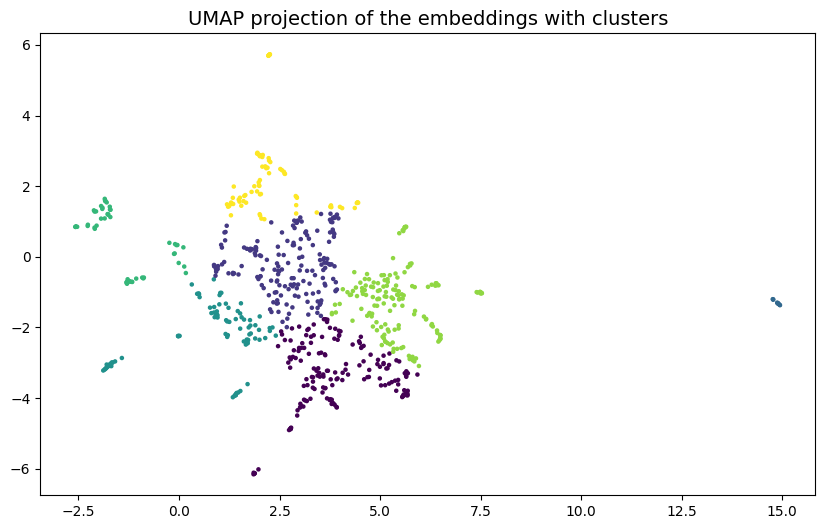

In [51]:
import matplotlib.pyplot as plt

# Visualize clusters in a 2D scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clusters, s=5)
plt.title('UMAP projection of the embeddings with clusters', fontsize=14)
plt.show()

## Clustering con K-means
El objetivo de k-means es reducir o minimizar la suma de las distancias entre el centroide del cluster y los puntos en él.


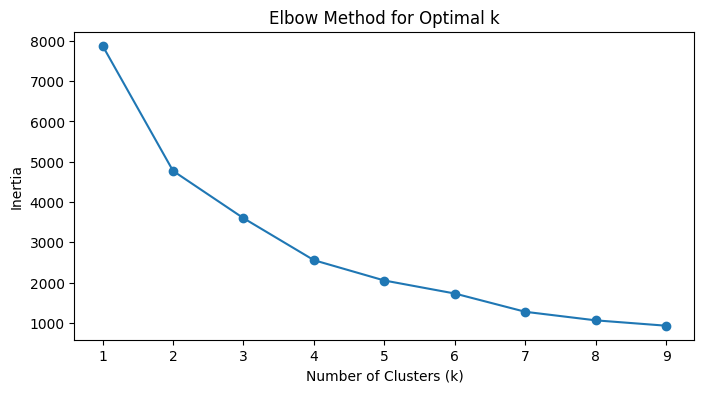

In [52]:
# List to store inertias for different k values
inertia = []

# Range of k values to test
k_values = range(1, 10)  

# Train KMeans model for each k and store inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(umap_embeddings)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.xticks(k_values)
plt.show()

In [53]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_embeddings)


print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
print(kmeans.inertia_) 
print(kmeans.n_iter_) 

[[ 0.6407776  -3.8398628 ]
 [ 2.2505178  -1.1175071 ]
 [14.868091   -1.2950953 ]
 [ 4.9964595  -2.06842   ]
 [-1.4698966   0.51347804]
 [ 2.6339793   1.7885925 ]]
[3 3 3 1 3 5 4 3 2 1 5 2 0 3 5 3 0 0 5 5 5 5 4 3 1 1 1 5 4 1 1 3 1 3 3 3 3
 3 5 5 3 3 3 5 5 5 5 3 0 0 1 5 4 4 1 3 1 3 1 3 3 3 3 1 3 3 5 5 5 5 1 3 0 0
 1 1 4 4 1 3 1 3 5 1 3 3 3 3 3 1 5 5 4 5 5 3 0 0 1 1 4 4 1 3 1 3 5 3 1 3 1
 3 3 1 1 4 5 5 0 0 1 1 4 4 1 3 1 3 1 1 1 3 3 3 3 3 4 5 4 5 5 3 0 0 1 1 4 1
 1 3 3 3 1 3 1 3 3 3 3 1 5 5 4 5 5 3 1 0 1 1 4 1 1 3 1 3 3 3 3 3 3 3 3 1 5
 5 4 5 5 3 1 1 1 1 4 1 1 3 1 2 1 5 1 3 3 3 3 1 5 5 4 5 5 3 1 1 1 1 4 1 1 3
 1 3 3 3 4 3 3 3 3 1 5 5 4 5 5 1 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 1 5 5 4 5
 5 3 1 0 1 1 3 1 3 1 3 3 3 3 3 3 1 5 5 4 5 5 3 1 1 1 1 1 3 3 3 3 3 3 5 3 5
 5 4 5 1 3 3 1 1 1 3 1 3 3 3 2 3 3 3 1 3 1 5 0 5 4 5 2 3 2 3 1 3 3 3 3 3 1
 3 1 5 0 5 4 5 3 3 3 0 1 1 3 3 3 3 1 3 1 5 0 5 4 1 1 3 3 1 1 1 3 3 3 3 1 3
 1 5 0 5 4 1 1 3 3 3 1 1 1 3 3 3 5 3 1 5 0 5 4 1 1 3 1 5 1 1 3 3 3 3 1 3 1
 5 0 5 4 1 3

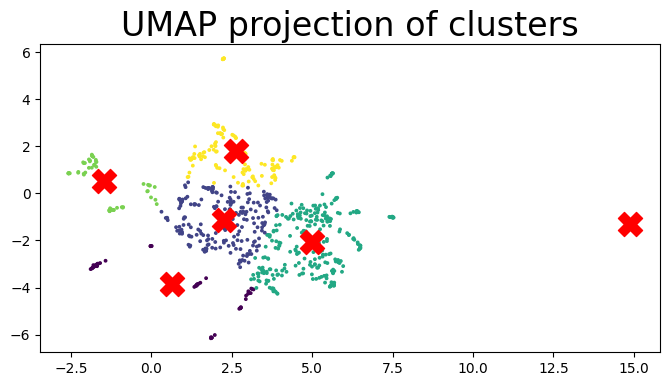

In [54]:
plt.figure(figsize=(8, 4))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=3, c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('UMAP projection of clusters', fontsize=24)
plt.show()

### Métricas de evaluación

* Coeficiente de silueta: Mide qué tan similar es un punto a su propio clúster en comparación con otros clústeres. Un valor alto indica una buena agrupación.
* Índice de Davies-Bouldin: Mide la relación entre la dispersión dentro de los clústeres y la separación entre ellos. Un valor bajo indica una buena agrupación.



In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print(silhouette_score(umap_embeddings, kmeans.labels_))
print(davies_bouldin_score(umap_embeddings, kmeans.labels_))

0.39094403
0.7838611917585921


### Analisis de Clusters

In [58]:
len(set(kmeans.labels_))

6

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Cluster 0: Top Words
[array([['salesforce', 'stripe', 'notificaciones', ..., 'negado',
        'needed', '02']], dtype=object)]

Cluster 1: Top Words
[array([['issue', 'api', 'cliente', ..., 'legales', 'legal', '02']],
      dtype=object)]

Cluster 2: Top Words
[array([['risks', 'assumptions', 'issues', ..., 'pasã³', 'patente', '02']],
      dtype=object)]

Cluster 3: Top Words
[array([['proyecto', 'dependencies', 'issues', ..., 'escribio',
        'escriban', 'inline']], dtype=object)]

Cluster 4: Top Words
[array([['airflow', 'actividades', 'datos', ..., 'of', 'ocurriã³', '02']],
      dtype=object)]

Cluster 5: Top Words
[array([['varios', 'b2b', 'pruebas', ..., 'mock', 'mo', '02']],
      dtype=object)]


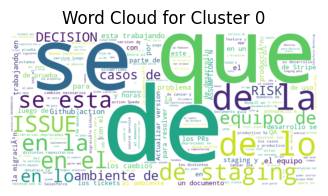

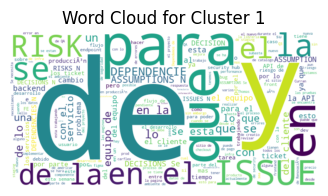

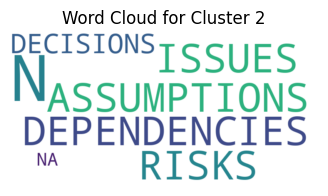

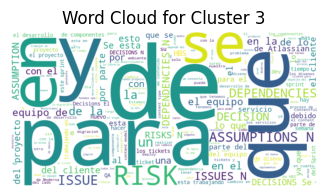

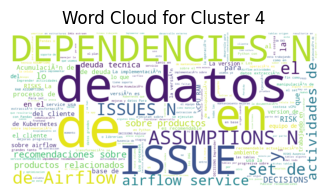

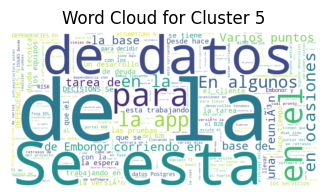

In [59]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('spanish')
vectorizer = TfidfVectorizer(stop_words=stop_words)

tfidf_matrix = vectorizer.fit_transform(string_list)

num_clusters = len(set(kmeans.labels_))

for cluster_id in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(kmeans.labels_) if label == cluster_id]
    cluster_texts = [string_list[i] for i in cluster_indices]

    cluster_tfidf_sum = tfidf_matrix[cluster_indices].sum(axis=0)
    top_word_indices = cluster_tfidf_sum.argsort()[0, ::-1][:10]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_word_indices]

    print(f"\nCluster {cluster_id}: Top Words")
    print(top_words)

# Generate word clouds per cluster
for cluster_id in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(kmeans.labels_) if label == cluster_id]
    cluster_texts = [string_list[i] for i in cluster_indices]

    all_text = ' '.join(cluster_texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(6, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_id}')
    plt.show()

### Análisis de Sentimiento

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):

    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'RAIDD_limpio' column
df['sentiment'] = df['RAIDD_limpio'].apply(analyze_sentiment)  # Use 'RAIDD_limpio' here

# Sentiment analysis by cluster
sentiment_by_cluster = df.groupby('cluster')['sentiment'].mean()
print(sentiment_by_cluster)

Al analizar el sentimiento de los textos en cada clúster y calcular el promedio, se observa que la mayoría de los clústeres tienen un sentimiento negativo, excepto el clúster 0 que tiene un sentimiento ligeramente positivo.

El resultado del análisis de sentimiento muestra el sentimiento promedio de cada clúster, donde cada número representa la polaridad del sentimiento que va de -1 a 1, siendo -1 el sentimiento más negativo y 1 el más positivo.

Análisis de Resultados:

    Cluster 0: Tiene un sentimiento ligeramente positivo (0.000708).
    Cluster 1: Tiene un sentimiento ligeramente negativo (-0.017008).
    Cluster 2: Tiene el sentimiento más negativo de todos (-0.651852).
    Cluster 3: Tiene un sentimiento negativo (-0.280476).
    Cluster 4: Tiene un sentimiento neutral (0.000000).
    Cluster 5: Tiene un sentimiento ligeramente negativo (-0.017961).

En general, la mayoría de los clústeres tienen un sentimiento negativo, lo que indica que los reportes en esos clústeres tienden a expresar más negatividad. El clúster 2 es el que tiene el sentimiento más negativo, lo que sugiere que los reportes en este clúster podrían contener información sobre problemas o riesgos más serios.

Recomendaciones:

* Investigar el Cluster 2: Analizar con más detalle los reportes en el clúster 2 para comprender las causas de la negatividad y tomar medidas para abordar los problemas.
* Profundizar en el Análisis: Realizar un análisis más profundo del lenguaje en cada clúster, incluyendo la identificación de palabras clave y temas, para obtener una comprensión más completa del contexto y las razones detrás del sentimiento expresado.
* Monitorear el Sentimiento: Dar seguimiento al sentimiento en los clústeres a lo largo del tiempo para identificar tendencias y cambios en la percepción de los proyectos.

